In [9]:
import pandas as pd
%config Completer.use_jedi = False



In [683]:
import pandas as pd
import csv
import numpy as np
df_go=pd.read_csv('./datas/고혈압2.csv')

df_stress=pd.read_csv('./datas/스트레스데이터.csv')

'''
시군구별(1)	2014	2015	2016	2017	2018	2019	2020	2021	2022	2023
서울특별시	29.7	30.3	29.1	26.8	26.4	25.8	27.8	26.3	24.0	25.4
부산광역시	25.9	26.0	25.2	24.3	22.9	21.9	23.1	23.2	20.8	22.0
대구광역시	25.2	24.4	24.9	23.9	21.9	23.4	21.6	22.1	20.3	21.8
인천광역시	32.3	30.5	29.5	27.6	30.4	28.1	30.7	27.5	24.2	25.4
광주광역시	27.5	27.0	27.7	27.5	25.6	26.7	25.8	25.8	24.3	23.8
대전광역시	28.1	28.4	30.6	24.3	26.5	23.8	22.3	22.2	23.4	26.9
울산광역시	24.5	22.9	23.8	23.3	23.8	22.3	23.8	23.3	20.5	23.7
세종특별자치시	28.1	31.9	25.3	28.9	30.9	28.4	24.0	24.9	20.1	25.5
경기도	29.9	30.5	29.5	29.1	27.6	26.5	27.5	26.5	23.2	26.3
강원특별자치도	25.5	26.8	24.8	26.6	25.0	22.8	24.9	24.4	22.0	24.3
충청북도	28.2	28.5	26.9	27.7	25.5	24.3	24.0	24.6	22.7	24.5
충청남도	28.8	28.2	27.6	29.0	26.0	27.6	25.2	24.9	22.9	25.0
전라북도	26.3	24.1	23.1	21.9	26.4	23.6	24.6	23.1	22.7	23.9
전라남도	25.3	24.4	24.1	23.4	23.3	22.1	18.8	21.0	19.6	22.9
경상북도	25.2	24.0	23.6	22.6	22.6	21.8	21.6	21.4	20.4	21.0
경상남도	24.6	24.3	24.2	20.9	23.4	21.6	23.5	22.2	20.7	22.5
제주특별자치도	28.8	25.8	29.0	23.4	25.4	21.9	24.6	23.8	23.0	22.5

고혈압도 같은 양식
'''
#시군별 삭제 어차피 0~16 서울~ 제주 
df_go.drop('시군구별(1)',axis=1,inplace=True)
df_stress.drop('시군구별(1)',axis=1,inplace=True)

go_list=[]
stress_list=[]


for i in df.index:
    go_list.append(df_go.loc[i].values)
    stress_list.append(df_stress.loc[i].values)


go_list=np.array(go_list)
stress_list=np.array(stress_list)
# 배열 평탄화 
stress_list=stress_list.flatten()
go_list=go_list.flatten()


df_stress_go=pd.DataFrame({
    '고혈압':go_list,
    '스트레스':stress_list
})


sum_stress_list=[]

#각 도시마다 2014~ 2023 까지 평균 sum_stress_list 에 넣음 0번에는 서울 ~ 16번에 제주 
for i in df2.index:
    sum_stress_list.append(df2.iloc[i].mean())
    
df_stress_go

,고혈압,스트레스
0,22.4,29.7
1,22.0,30.3
2,22.3,29.1
3,23.8,26.8
4,23.7,26.4
...,...,...
165,23.7,21.9
166,25.4,24.6
167,24.2,23.8
168,27.3,23.0


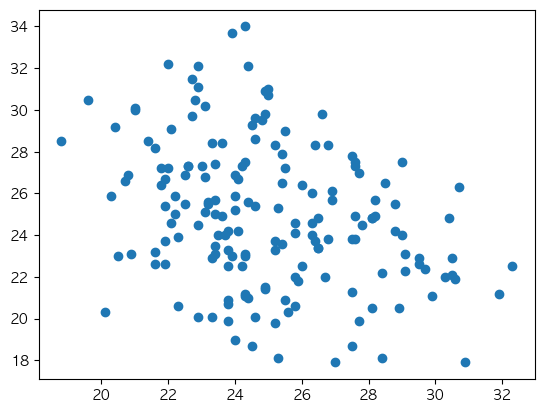

In [265]:
from matplotlib import pyplot as plt
#%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그래프를 볼 수 있게 하는 기능

#plt.scatter(df['스트레스'], df['범죄율']) 
#plt.show() #그래프 표시

plt.scatter(df_stress_go['스트레스'],df_stress_go['고혈압'])
plt.show()

In [378]:
correlation = df_stress_go.corr()
print(correlation)

           고혈압      스트레스
고혈압   1.000000 -0.324835
스트레스 -0.324835  1.000000


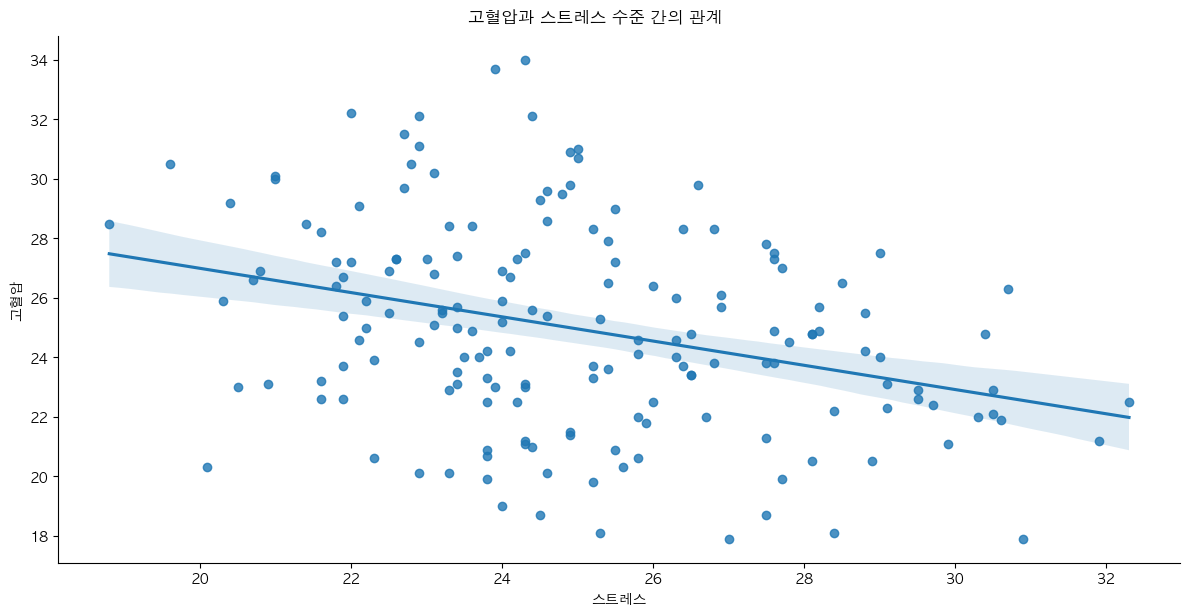

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
sns.lmplot(x='스트레스', y='고혈압', data=df_stress_go, height=6, aspect=2)

plt.suptitle('고혈압과 스트레스 수준 간의 관계', y=1.02)
plt.show()

[35.8 35.35 34.7 28.0 33.1 35.5 32.5 34.0 32.05 27.1 31.45 37.8 35.25
 36.95 35.0 36.95 37.55 33.3 31.7]


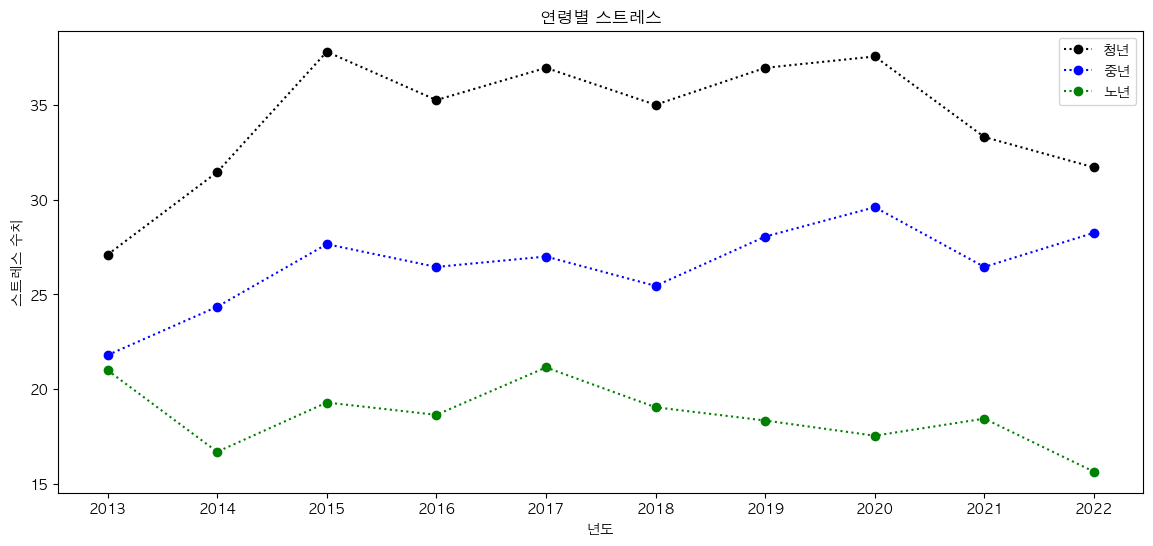

In [675]:
import pandas as pd
import csv
import numpy as np
stress_gender=pd.read_csv("./datas/스트레스남여.csv")
'''
통계표명:	성 및 연령별 스트레스 인지율 1)2)	
단위:	%																			
		1998	2001	2005	2007	2008	2009	2010	2011	2012	2013	2014	2015	2016	2017	2018	2019	2020	2021	2022
전체		36.6	34.6	35.1	27.1	28.9	31.0	28.2	27.9	27.0	23.8	25.5	29.6	27.9	29.1	27.3	28.6	29.0	26.4	25.6
성별	남자	36.7	34.6	35.0	23.7	26.8	28.6	25.1	25.4	23.5	21.8	23.6	28.6	27.0	27.5	24.9	27.4	27.5	24.7	23.7
	여자	36.4	34.6	35.2	30.3	31.0	33.3	31.4	30.4	30.3	25.7	27.2	30.5	28.8	30.7	29.6	29.8	30.6	28.1	27.4
연령별	19-29세	32.8	33.7	33.0	28.0	32.6	34.6	32.1	34.9	34.0	26.5	28.9	36.9	32.8	37.9	35.7	35.1	34.9	30.0	29.9
	30-39세	38.8	37.0	36.4	28.0	33.6	36.4	32.9	33.1	30.1	27.7	34.0	38.7	37.7	36.0	34.3	38.8	40.2	36.6	33.5
	40-49세	38.6	36.6	35.9	28.4	27.4	30.4	27.4	27.3	28.4	25.0	26.9	28.9	28.4	27.5	28.1	31.1	32.3	31.3	33.8
	50-59세	39.2	33.3	36.3	22.9	25.8	27.3	25.7	22.2	21.9	18.6	21.8	26.4	24.5	26.5	22.8	25.0	26.9	21.6	22.7
	60-69세	34.9	32.0	38.5	27.1	21.7	26.9	22.4	20.6	19.1	19.9	15.6	20.0	20.7	20.9	21.3	19.2	19.0	18.7	16.9
	70세 이상	31.3	29.1	28.6	26.3	26.1	23.1	22.7	23.3	21.3	22.1	17.8	18.6	16.6	21.4	16.8	17.5	16.1	18.2	14.4
'''
#남자만 가져오기 
man_stress=stress_gender.loc[3][2:].values


#여자만 가져오기
woman_stress=stress_gender.loc[4][2:].values


#19~39 
youngMan_stress=(stress_gender.loc[5][2:].values+stress_gender.loc[6][2:].values)/2
print(youngMan_stress)
# print(len(youngMan_stress))
#40 ~ 59
middleMan_stress=(stress_gender.loc[7][2:].values+stress_gender.loc[8][2:].values)/2
# print(len(middleMan_stress))
#60세이상
oldMan_stress=(stress_gender.loc[9][2:].values+stress_gender.loc[10][2:].values)/2
# print(len(oldMan_stress))



woman_stress=woman_stress[9:]
man_stress=man_stress[9:]
oldMan_stress=oldMan_stress[9:]
youngMan_stress=youngMan_stress[9:]
middleMan_stress=middleMan_stress[9:]


# print(len(oldMan_stress))
# print(len(middleMan_stress))
# print(len(youngMan_stress))


bar_width = 0.5
years= list(map(int,(range(2013,2023))))


plt.figure(figsize=(14, 6))
#plt.bar(years, man_stress, bar_width, label='남성', color='blue')
plt.plot(years, youngMan_stress, ':o', color='k', label='청년')
plt.plot(years, middleMan_stress, ':o', color='b', label='중년')
plt.plot(years, oldMan_stress, ':o', color='g', label='노년')
plt.xlabel('년도')
#plt.grid('True')
plt.ylabel('스트레스 수치')
plt.title('연령별 스트레스')
plt.xticks(years)
plt.legend()
plt.show()




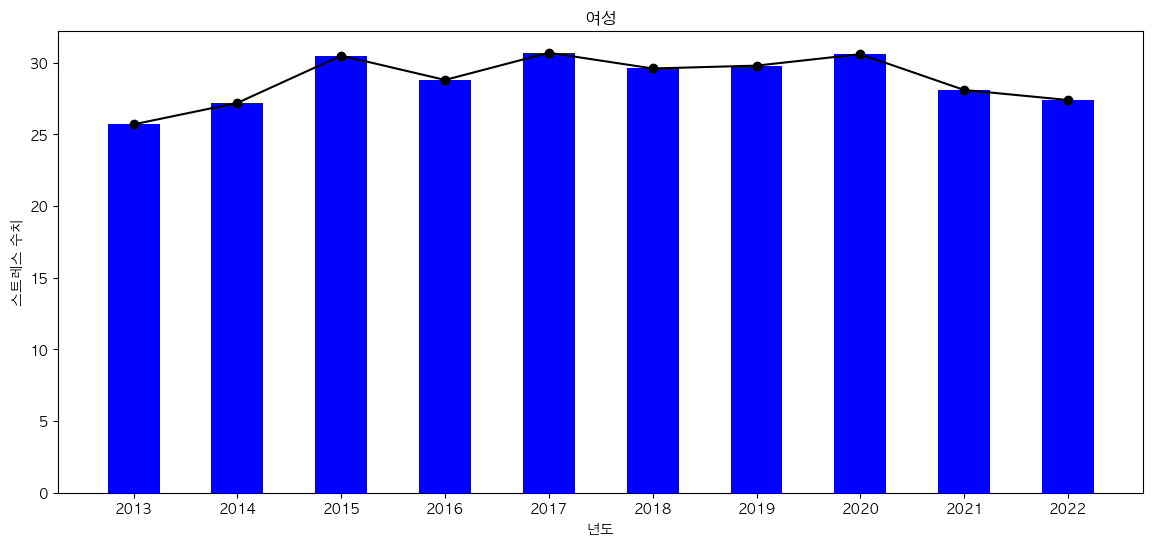

In [271]:
plt.figure(figsize=(14, 6))
plt.bar(years, woman_stress, bar_width, label='여성', color='blue')
plt.plot(years,woman_stress,'-ok')
plt.xlabel('년도')
plt.ylabel('스트레스 수치')
plt.title('여성')
#plt.grid('True')
plt.xticks(years)
plt.show()


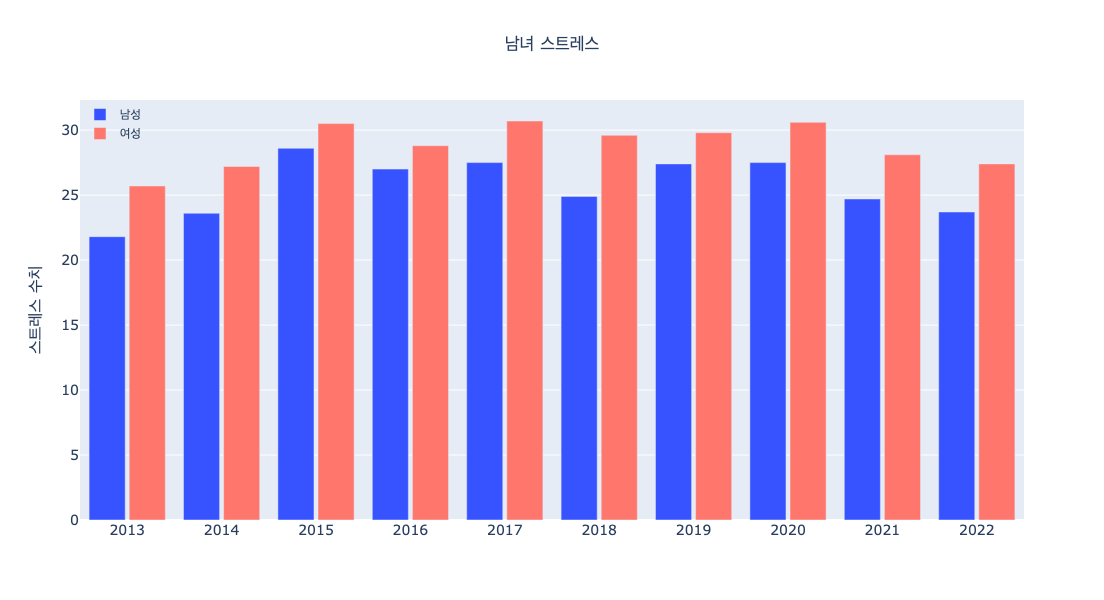

In [743]:
import plotly.graph_objects as go

years = list(range(2013, 2023))

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=man_stress,
                name='남성',
                marker_color='rgb(55, 83, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=woman_stress,
                name='여성',
                marker_color='rgb(255, 118, 109)'
                ))

fig.update_layout(
    title='남녀 스트레스',
    title_x=0.5,  # 타이틀을 중앙으로 정렬
    xaxis=dict(
        tickfont_size=14,
        dtick=1  # x축에 모든 년도가 표시되도록 설정
    ),
    yaxis=dict(
        title='스트레스 수치',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    width=1000,  # 그래프의 너비
    height=600   # 그래프의 높이
)

fig.show()


In [665]:
#!pip install googlemaps
import googlemaps
import yaml
my_key=""

# api key 가져오기
with open('./datas/googleMapApi.yaml') as f:
    file = yaml.full_load(f)
    my_key=file['key']

geojson_path = './datas/SIDO_MAP_2022.json'  

places=[]


#시 도 이름 가져오기
with open(geojson_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)
    sidoList=[]
    for i in geojson_data['features']:
        places.append(i['properties']['CTP_KOR_NM'])
   
maps = googlemaps.Client(key=my_key)

lat_stress = []  #위도
lng_stress = []  #경도


i=0
# Plcaes -> /datas/SIDO_MAP_2022.json 여기서 받아온 지역이름 

''' 
    지역 places 있는 지역이름을 구글api에 넘겨서 좌표를 받아 오는 부분 
'''
for place in places:   
    i = i + 1
    try:
        geo_location = maps.geocode(place)[0].get('geometry')
        lat_stress.append(geo_location['location']['lat'])
        lng_stress.append(geo_location['location']['lng'])
        

    except:
        lat_stress.append('')
        lng_stress.append('')
        print("%d번 인덱스 위치를 찾는데 실패했습니다."%(i))


# 데이터프레임만들어 출력하기

df = pd.DataFrame({'위도':lat_stress, '경도':lng_stress}, index=places)
df

,위도,경도
서울특별시,37.565213,126.977352
부산광역시,35.173112,129.071412
대구광역시,35.850103,128.520619
인천광역시,37.475158,126.631267
광주광역시,35.150082,126.855907
대전광역시,36.357758,127.386746
울산광역시,35.537680,129.328012
세종특별자치시,36.601226,127.298209
경기도,37.414285,127.468140
강원도,37.827200,128.316573


In [285]:
from folium.features import CustomIcon
import folium
import pandas as pd
from folium.plugins import HeatMap
center = [37.541, 126.986]


m = folium.Map(location=center, zoom_start=7)
#print(len(station_group.sum(axis=1).values))
#print(station_group.shape)
#print(len(address_station['위도']))
# 서울 부산 대구 인천 광주 
#10 ro

print(len(lat_stress))
print(len(sum_stress_list))
sum_group=pd.DataFrame({
    '위도':lat_stress,
    '경도':lng_stress,
    '스트레스지역':sum_stress_list,
})

print(sum_group)


data_list = sum_group[['위도','경도','스트레스지역']].values.tolist()

c_dic = {'서울특별시':'darkblue','부산광역시':'green','대구광역시':'orange','인천광역시':'lightblue','광주광역시':'darkpurple','대전광역시':'black','울산광역시':'darkgreen','세종특별자치시':'pink','경기도':'beige','강원특별자치도':'blue',
        '충청북도':'beige','충청남도':'cadetblue','전라북도':'cadetblue','전라남도':'cadetblue','경상북도':'cadetblue','경상남도':'cadetblue','제주특별자치도':'blue'}
image_paths = {
    '서울특별시': './datas/서울시.png',
    
}
# for i in sum_group.index:
#     icon_path = image_paths.get(places[i], None)
#     if icon_path: 
#         icon = CustomIcon(icon_image=icon_path, icon_size=(30, 30))  # 이미지 크기 조절
#         folium.Marker(
#             location=list(sum_group.loc[i, ['위도', '경도']]),
#             popup=places[i],
#             icon=icon
#         ).add_to(m)
#     else:
#         folium.Marker(
#             location=list(sum_group.loc[i, ['위도', '경도']]),
#             popup=places[i],
#             icon=folium.Icon(color=c_dic[places[i]], icon='star')
#         ).add_to(m)

HeatMap(data_list, radius=50, opacity=0.6).add_to(m)


#m.save('./datas/스트레스지수2.html')

m

17
17
           위도          경도  스트레스지역
0   37.565213  126.977352   27.16
1   35.173112  129.071412   23.53
2   35.850103  128.520619   22.95
3   37.475158  126.631267   28.62
4   35.150082  126.855907   26.17
5   36.357758  127.386746   25.65
6   35.537680  129.328012   23.19
7   36.601226  127.298209   26.80
8   37.414285  127.468140   27.66
9   37.827200  128.316573   24.71
10  36.802263  127.723768   25.69
11  36.474210  126.781950   26.52
12  35.749168  127.125859   23.97
13  34.853834  126.868079   22.49
14  36.397390  128.987674   22.42
15  35.376346  128.147727   22.79
16  33.378561  126.566191   24.82


In [729]:
from folium.features import CustomIcon
import folium
import pandas as pd
from folium.plugins import HeatMap
import pandas as pd
import folium
import webbrowser


# 지도 중심 좌표 설정
center = [37.541, 126.986]

m = folium.Map(location=center, zoom_start=7,tiles='CartoDB Positron')

geojson_path = './datas/SIDO_MAP_2022.json'

sidoList=[]

# sidoList에  지역 코드 넣는 부분 
with open(geojson_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)
    for i in geojson_data['features']:
        sidoList.append(i['properties']['CTPRVN_CD'])


#0~16 서울~ 제주도  아까 위에서 받아온 정보로 sum_group
# 히트맵에 사용
sum_group = pd.DataFrame({
    '위도': lat_stress,
    '경도': lng_stress,
    '스트레스지역': sum_stress_list,
})


#CTPRVN_CD -> json 에서 지역 번호 ex) ['featuers']['properties']['CTPRVN_CD']=11 
#stress_index-> 스트레스 지역별 2014~2023 평균값 
stress_data = pd.DataFrame({
    'CTPRVN_CD': sidoList, 
    'stress_index': sum_stress_list
})

# 지도에 색칠하는 부분 
folium.Choropleth(
    geo_data=geojson_data, # 여기에 지역 코드랑 좌표에따라 시도 별 구분 
    data=stress_data,  
    columns=['CTPRVN_CD', 'stress_index'],
    key_on='feature.properties.CTPRVN_CD', #지역 번호 키값   
    fill_color='YlOrRd',  
    fill_opacity=0.4,
    line_opacity=0.2,
    legend_name='스트레스 지수',
    nan_fill_color='gray',  
).add_to(m)



data_list = sum_group[['위도', '경도', '스트레스지역']].values.tolist()

#히트맵 만드는 부분 
HeatMap(data_list, radius=80, opacity=0.6,
        gradient={0.1: 'lightgreen', 0.5: 'yellow', 1.0: 'red'},
       ).add_to(m)

# 결과 지도 저장
m.save('folium_kr.html')

m


In [749]:
import folium
import pandas as pd
import branca.colormap as cm
import json

# 지도 중심 좌표 설정
center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=7,tiles="CartoDB Positron")
#지역명 리스트
sidoList=[]
geojson_path = './datas/SIDO_MAP_2022.json' 

# 서울시 ~ 제주시까지 지역명이 sidoList에 담긴다.
with open(geojson_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)
    for i in geojson_data['features']:
        sidoList.append(i['properties']['CTPRVN_CD'])
    
stress_data = pd.DataFrame({
    'CTPRVN_CD': sidoList,
    'stress_index': sum_stress_list
})

folium.Choropleth(
    geo_data=geojson_data,
    data=stress_data,
    columns=['CTPRVN_CD', 'stress_index'],
    key_on='feature.properties.CTPRVN_CD',  
    fill_color='YlOrRd',  
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='스트레스 지수',
    nan_fill_color='gray',  
).add_to(m)


# 결과 지도 저장
m.save('folium_stress_map.html')
m

In [751]:
import folium
import pandas as pd
import json
from folium.plugins import HeatMap

# 지도 중심 좌표 설정
center = [37.541, 126.986]

m = folium.Map(location=center, zoom_start=7, tiles='CartoDB Positron')

geojson_path = './datas/SIDO_MAP_2022.json'

sidoList = []

# sidoList에 지역 코드 넣는 부분 
with open(geojson_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)
    for i in geojson_data['features']:
        sidoList.append(i['properties']['CTPRVN_CD'])

# 스트레스 데이터 준비
sum_group = pd.DataFrame({
    '위도': lat_stress,
    '경도': lng_stress,
    '스트레스지역': sum_stress_list,
})

stress_data = pd.DataFrame({
    'CTPRVN_CD': sidoList, 
    'stress_index': sum_stress_list
})

# 수도권 지역 코드 (예: 서울, 인천, 경기)
metropolitan_codes = ['11', '28', '41']  # 서울, 인천, 경기 지역 코드

# 지도에 색칠하는 부분 
folium.Choropleth(
    geo_data=geojson_data,
    data=stress_data,
    columns=['CTPRVN_CD', 'stress_index'],
    key_on='feature.properties.CTPRVN_CD',
    fill_color='YlOrRd',  # 기본 색상 팔레트
    fill_opacity=0.7,     # 불투명도 증가
    line_opacity=0.5,
    legend_name='스트레스 지수',
    nan_fill_color='lightgrey',  # 결측값 색상 변경
).add_to(m)


# for feature in geojson_data['features']:
#     if feature['properties']['CTPRVN_CD'] in metropolitan_codes:
#         feature['properties']['fillColor'] = '#FF0000'  # 빨간색
#     else:
#         feature['properties']['fillColor'] = '#FFFF00'  # 노란색


data_list = sum_group[['위도', '경도', '스트레스지역']].values.tolist()

HeatMap(data_list, radius=80, opacity=0.7,  # 불투명도 증가
        gradient={0: 'lightgreen', 0.5: 'yellow', 1: 'red'},  # 스트레스 지수에 따라 색상 설정
       ).add_to(m)

# 결과 지도 저장
m.save('folium_kr.html')

m


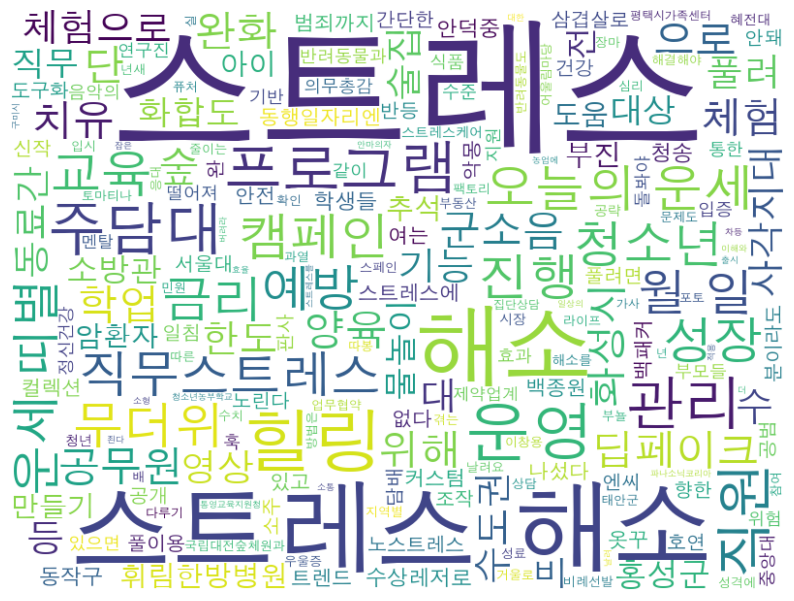

In [812]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

# 네이버 뉴스에서 특정 키워드로 검색하여 기사 제목을 가져오는 함수
def get_naver_news_titles(query, pages=1):
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    titles = []

    for page in range(1, pages + 1):
        # 네이버 뉴스 검색 결과 URL 구성
        url = f"https://search.naver.com/search.naver?where=news&query={query}&start={10 * (page - 1) + 1}"
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        # 뉴스 제목 추출
        for item in soup.find_all('a', {'class': 'news_tit'}):
            titles.append(item.get_text())

    return titles

# 텍스트 전처리 및 워드 클라우드 생성 함수
def generate_wordcloud(text):
    # 텍스트에서 한글만 추출
    text = ' '.join(text)
    hangul_text = re.findall(r'[가-힣]+', text)
    text = ' '.join(hangul_text)

    # 워드 클라우드 생성
    wordcloud = WordCloud(
        font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf',  
        background_color='white',
        width=800,
        height=600
    ).generate(text)

    # 워드 클라우드 시각화
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
# def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     # 빨간색의 강도를 빈도에 따라 조절 (0~255)
#     red = 255
#     green = random.randint(0, 100)
#     blue = random.randint(0, 100)
#     return f"rgb({red}, {green}, {blue})"

# # 메인 함수
if __name__ == "__main__":
    query = "스트레스 해소"
    news_titles = get_naver_news_titles(query, pages=10)
    generate_wordcloud(news_titles)


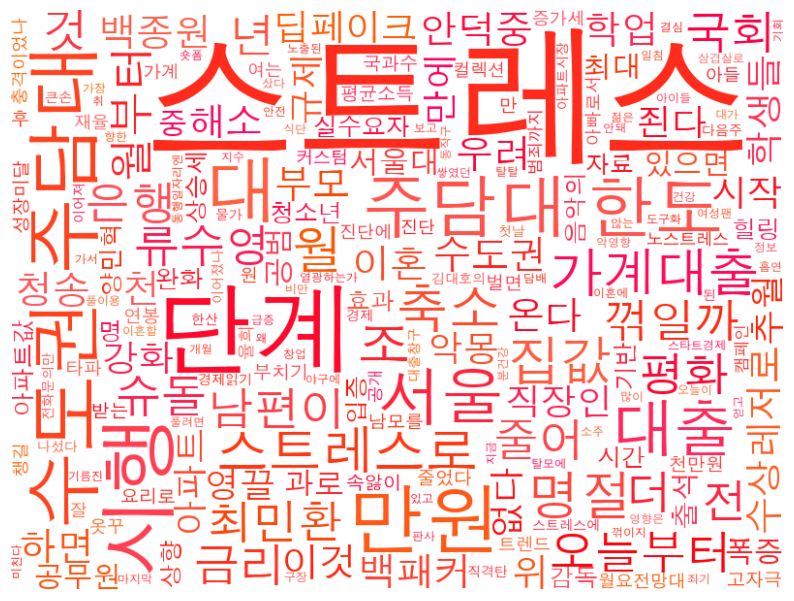

In [784]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import random


def get_naver_news_titles(query, pages=1):
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    titles = []

    for page in range(1, pages + 1):
        # 네이버 뉴스 검색 결과 URL 구성
        url = f"https://search.naver.com/search.naver?where=news&query={query}&start={10 * (page - 1) + 1}"
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        # 뉴스 제목 추출
        for item in soup.find_all('a', {'class': 'news_tit'}):
            titles.append(item.get_text())

    return titles

# 단어 색상 함수를 정의하여 빈도수가 높을수록 빨간색에 가깝게 설정
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 빨간색의 강도를 빈도에 따라 조절 (0~255)
    red = 255
    green = random.randint(0, 100)
    blue = random.randint(0, 100)
    return f"rgb({red}, {green}, {blue})"

# 텍스트 전처리 및 워드 클라우드 생성 함수
def generate_wordcloud(text):
    # 텍스트에서 한글만 추출
    text = ' '.join(text)
    hangul_text = re.findall(r'[가-힣]+', text)
    text = ' '.join(hangul_text)

    # 워드 클라우드 생성
    wordcloud = WordCloud(
        font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf',  
        background_color='white',
        width=800,
        height=600,
        color_func=red_color_func 
    ).generate(text)

    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


if __name__ == "__main__":
    query = "스트레스 원인"
    news_titles = get_naver_news_titles(query, pages=100)  
    generate_wordcloud(news_titles)
